# Explorando e vetorizando os dados

In [1]:
import pandas as pd

In [2]:
uri_aval_atividade = 'https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/avaliacoes_atividade.csv'
uri_dataset_avaliacoes = 'https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/dataset_avaliacoes.csv'
uri_novas_avaliacoes = 'https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/novas_avaliacoes.csv'

In [3]:
df = pd.read_csv(uri_dataset_avaliacoes)
df.head()

,ID_avaliacao,avaliacao,nota,sentimento
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo


In [4]:
df.shape

(15501, 4)

In [5]:
df['sentimento'].value_counts()

,count
sentimento,
positivo,7890
negativo,7611


In [6]:
print('Positivo\n')

df['avaliacao'][0]

Positivo



'Esse smartphone superou minhas expectativas, recomendo'

In [7]:
print('Negativo\n')

df['avaliacao'][2]

Negativo



'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.'

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
texto = ['Comprei um produto ótimo', 'Comprei um produto péssimo']

vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [10]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz_esparsa

,comprei,produto,péssimo,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [11]:
vetorizar = CountVectorizer(lowercase=False)

bag_of_words = vetorizar.fit_transform(df['avaliacao'])
matriz_esparsa_avaliacao = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
bag_of_words.shape

(15501, 23352)

In [12]:
matriz_esparsa_avaliacao.shape

(15501, 23352)

In [13]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)

bag_of_words = vetorizar.fit_transform(df['avaliacao'])
matriz_esparsa_avaliacao = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [14]:
matriz_esparsa_avaliacao.head()

,Não,Produto,ainda,antes,as,até,bem,bom,chegou,com,...,qualidade,que,recebi,recomendo,se,sem,tem,um,uma,veio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,2,0,0,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bag_of_words, df['sentimento'], random_state=4978)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

accuracy = model.score(x_test, y_test)
print(f'Acurácia: {accuracy * 100:.4f}')

Acurácia: 79.8246


# Criando as funções para tratar os dados e treinar o modelo

In [17]:
def classificar_texto(df, col_name_avaliacao, col_name_sentimento):
  #importando as bibliotecas
  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LogisticRegression

  #utilização da técnica bag_of_words para transformar a coluna de avaliação em uma matriz numérica
  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(df[col_name_avaliacao])

  #separando os dados em treino e teste
  x_train, x_test, y_train, y_test = train_test_split(bag_of_words, df[col_name_sentimento], random_state=4978)

  #treinando o modelo
  model = LogisticRegression()
  model.fit(x_train, y_train)

  #calculando a acurácia do modelo
  accuracy = model.score(x_test, y_test)

  return print(f'A acurácia do modelo é de {accuracy * 100:.4f}%')

In [18]:
classificar_texto(df, 'avaliacao', 'sentimento')

A acurácia do modelo é de 79.8246%


# Explorando a frequência e o sentimento

In [19]:
from wordcloud import WordCloud

In [20]:
todas_palavras = [texto for texto in df['avaliacao']]
todas_palavras

['Esse smartphone superou minhas expectativas, recomendo',
 'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..',
 'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.',
 'Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento.',
 'Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor .',
 'Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!!',
 'o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado',
 'já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen',
 'nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA 

In [21]:
todas_palavras = ' '.join([text for text in df['avaliacao']])
todas_palavras

Output hidden; open in https://colab.research.google.com to view.

In [22]:
nuvem_palavras = WordCloud().generate(todas_palavras)

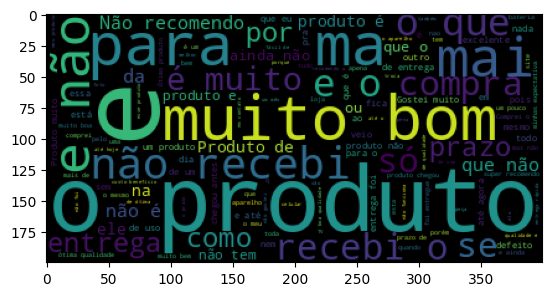

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

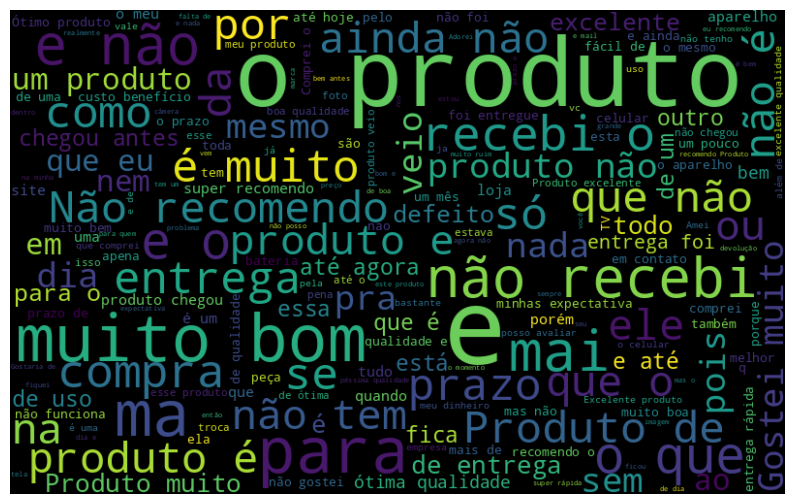

In [24]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

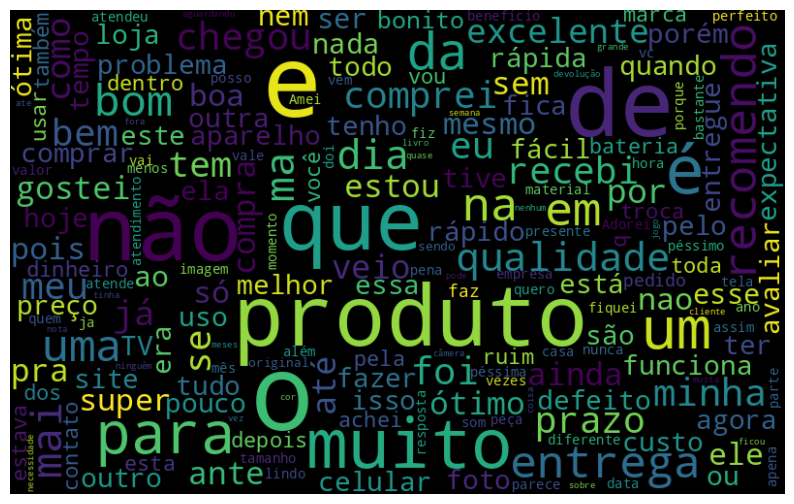

In [25]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
def criar_nuvem_palavras(df, name_col_avaliacao, name_col_sentimento, sentimento):
  # primeiro separamos o dataframe conforme o sentimento e depois transformamos em um único texto
  # poderia usar .query(f"sentimento == '{sentimento}'")[name_col_avaliacao], usando query do pandas
  palavras = df.loc[df[name_col_sentimento] == sentimento][name_col_avaliacao]
  todas_palavras = ' '.join(palavras)

  # criando o objeto nuvem de palavras
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

  # criando a figura com alguns ajustes para melhorar a visualização
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

  return plt.show()

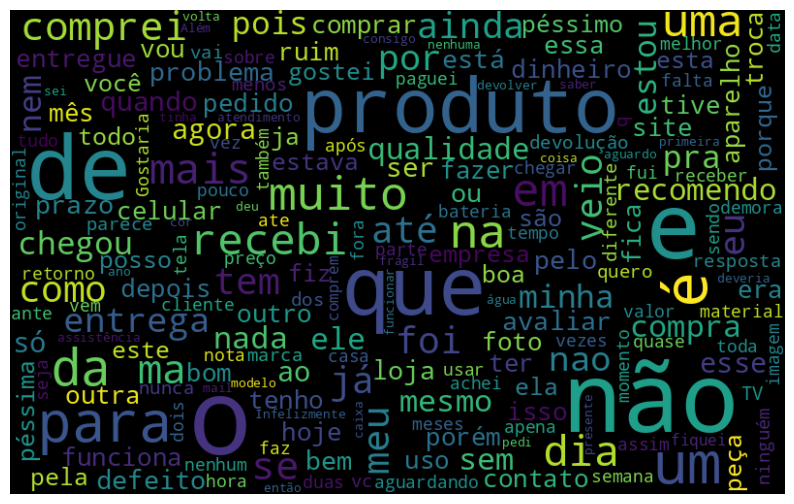

In [27]:
criar_nuvem_palavras(df, 'avaliacao', 'sentimento', 'negativo')

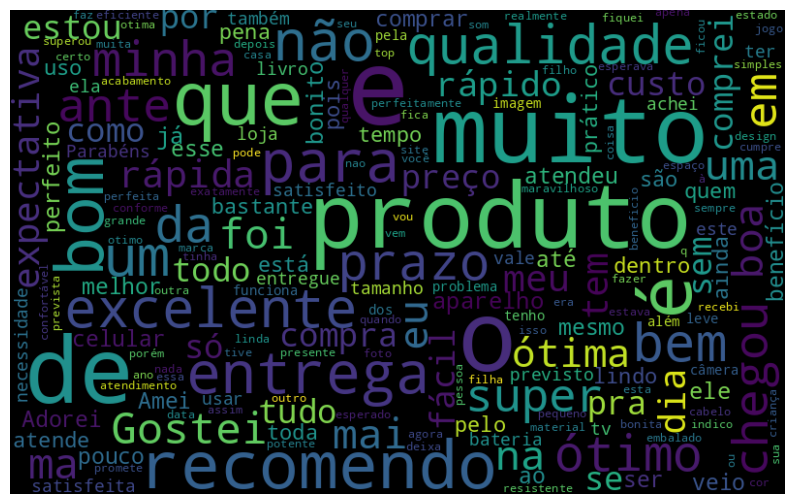

In [28]:
criar_nuvem_palavras(df, 'avaliacao', 'sentimento', 'positivo')

Separando o texto em grupos menores com o método de tokenização

In [29]:
todas_palavras

Output hidden; open in https://colab.research.google.com to view.

In [30]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [31]:
frases = ['um produto bom', 'um produto ruim']
frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'um produto bom': 1, 'um produto ruim': 1})

In [32]:
from nltk import tokenize

frase = 'o produto é excelente e a entrega foi muito rápida'
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['o', 'produto', 'é', 'excelente', 'e', 'a', 'entrega', 'foi', 'muito', 'rápida']


Aplicando aos dados reais

In [33]:
texto_tokenizado = token_espaco.tokenize(todas_palavras)
print(texto_tokenizado)

Output hidden; open in https://colab.research.google.com to view.

In [34]:
frequencia = nltk.FreqDist(texto_tokenizado)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [35]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequência': list(frequencia.values())})
df_frequencia.head(10)

,Palavra,Frequência
0,Esse,101
1,smartphone,33
2,superou,90
3,minhas,533
4,"expectativas,",79
5,recomendo,919
6,o,10865
7,cheiro,62
8,e,11813
9,muito,4328


In [36]:
df_frequencia.nlargest(columns='Frequência', n=10)

,Palavra,Frequência
8,e,11813
6,o,10865
29,de,10280
19,a,8873
46,que,7657
22,não,7286
163,é,4786
63,produto,4765
177,com,4641
130,do,4583


In [37]:
import seaborn as sns

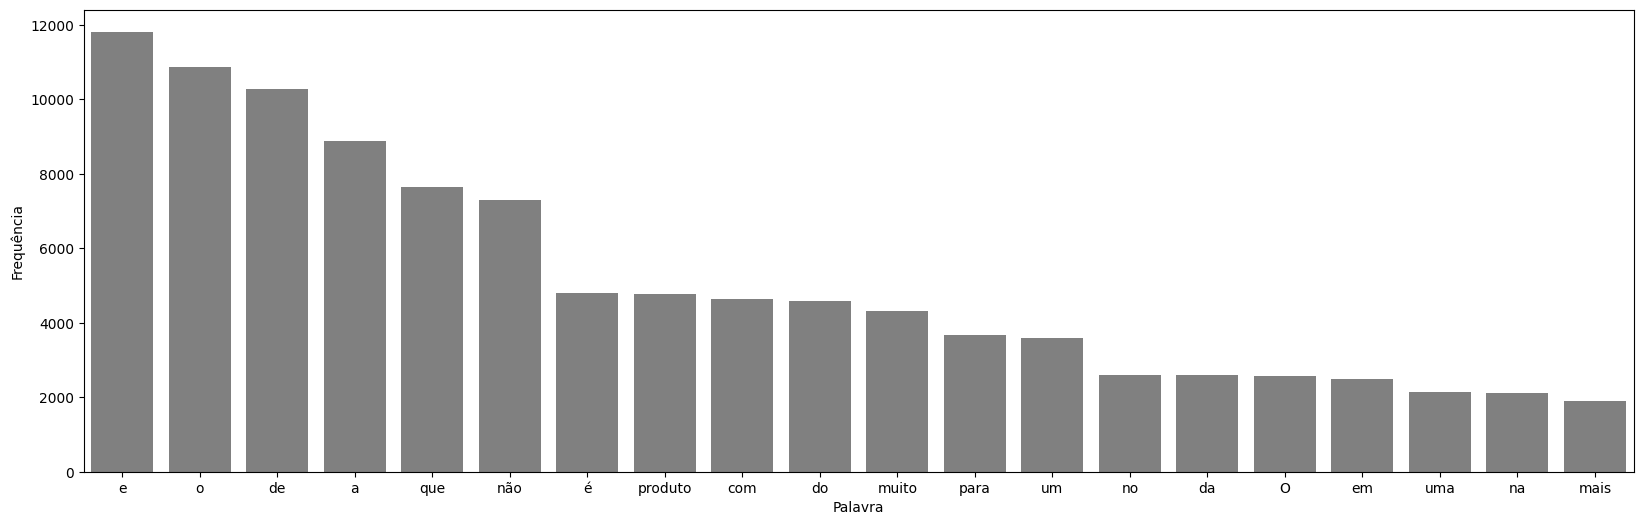

In [38]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequência', n=20), x='Palavra', y='Frequência', color='gray')
ax.set(ylabel='Frequência')
plt.show()

Função para gerar o gráfico de frequência

In [39]:
def grafico_frequencia(df, name_col_text, n_freq_word):
  words = [text for text in df[name_col_text]]
  all_words = ' '.join(words)

  # tokenizando o texto
  token = tokenize.WhitespaceTokenizer()
  token_text = token.tokenize(all_words)

  # criando o DataFrame com as frequências
  frequency = nltk.FreqDist(token_text)
  df_frequency = pd.DataFrame({'Palavra': list(frequency.keys()), 'Frequência': list(frequency.values())})

  # criando a visualização com seaborn e matplotlib
  plt.figure(figsize=(20, 6))
  ax = sns.barplot(data=df_frequency.nlargest(columns='Frequência', n=n_freq_word), x='Palavra', y='Frequência', hue='Palavra', palette="Spectral")
  ax.set(ylabel='Frequência')
  plt.show()

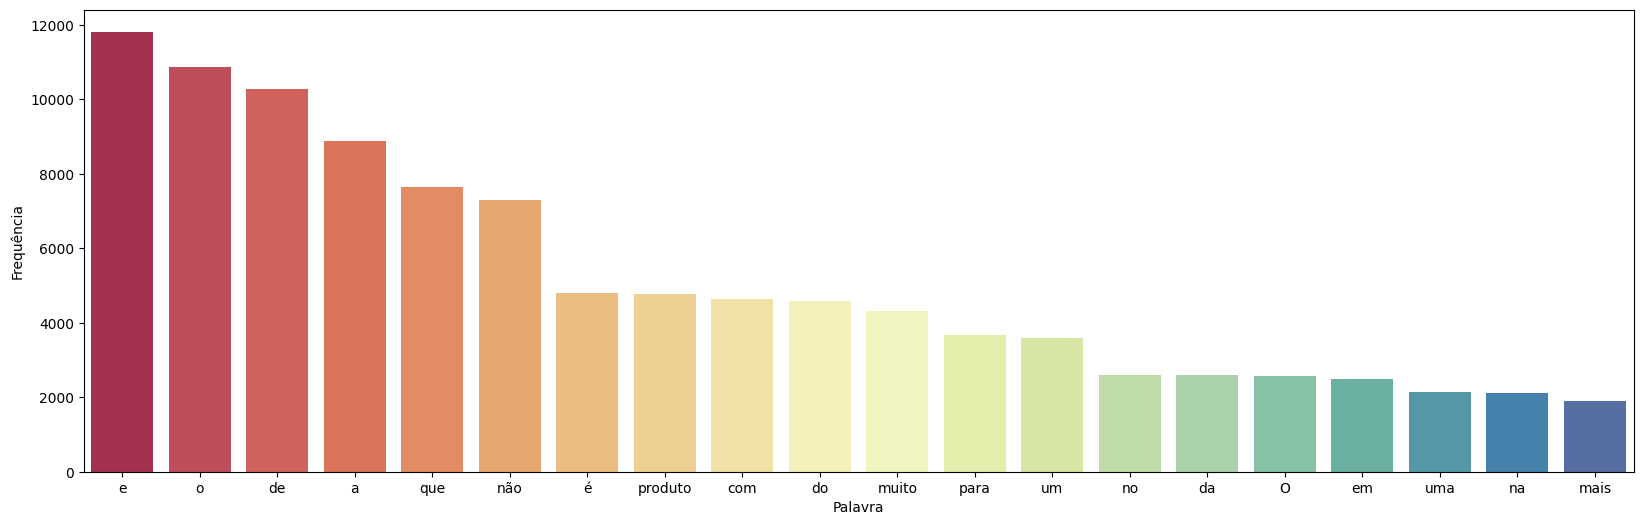

In [40]:
grafico_frequencia(df, 'avaliacao', 20)

# Limpando e armazenando dados textuais

In [41]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [42]:
frase_processada = []

for opniao in df['avaliacao']:
  tokens = tokenize.WhitespaceTokenizer()
  tokens_opniao = tokens.tokenize(opniao)
  nova_frase = [palavra for palavra in tokens_opniao if palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_1'] = frase_processada

In [43]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo"
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe..."
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif..."
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo..."


In [44]:
df['avaliacao'][0]

'Esse smartphone superou minhas expectativas, recomendo'

In [45]:
df['tratamento_1'][0]

'Esse smartphone superou expectativas, recomendo'

In [46]:
# função criada anteriormente -> parâmetros(dataframe, coluna com as avaliações, coluna com o sentimento)
classificar_texto(df, 'tratamento_1', 'sentimento')

A acurácia do modelo é de 81.0888%


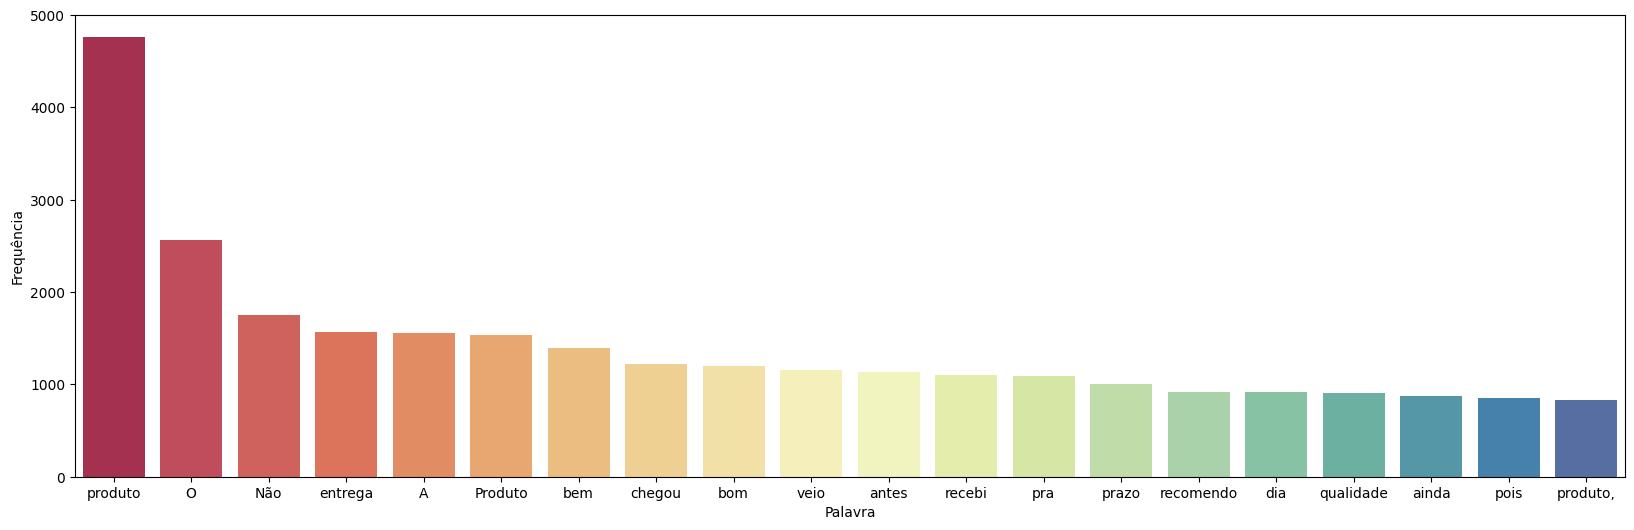

In [47]:
# função criada anteriormente -> parâmetros(dataframe, coluna com as avaliações, qtd de palavras retornadas)
grafico_frequencia(df, 'tratamento_1', 20)

Aplicando remoção da pontuação.

In [48]:
frase = df['tratamento_1'][0]
print(frase)

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

Esse smartphone superou expectativas, recomendo
['Esse', 'smartphone', 'superou', 'expectativas', ',', 'recomendo']


In [49]:
frase_sem_pontuacao = []

for opniao in df['tratamento_1']:

  tokens = tokenize.WordPunctTokenizer()
  tokens_pontuacao = tokens.tokenize(opniao)

  # o método .isalpha() permite somente conteúdo alfabético, 'alphabetical'
  nova_frase = [word for word in tokens_pontuacao if word.isalpha() and word not in palavras_irrelevantes]
  frase_sem_pontuacao.append(' '.join(nova_frase))

df['tratamento_2'] = frase_sem_pontuacao

df.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1,tratamento_2
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo",Esse smartphone superou expectativas recomendo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...,cheiro desagradavel pra incomoda nao recomendoo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe...",Eu fiz compra loja entregou produto compra fei...
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif...",Atendeu expectativas achei luz ruim nada dific...
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo...",Gostei achei ficou desejar qualidade fotos Ach...


In [50]:
df['tratamento_1'][10]

'Melhor esperado, cor maravilhosa! Recomendo. Deixa ambiente moderno'

In [51]:
df['tratamento_2'][10]

'Melhor esperado cor maravilhosa Recomendo Deixa ambiente moderno'

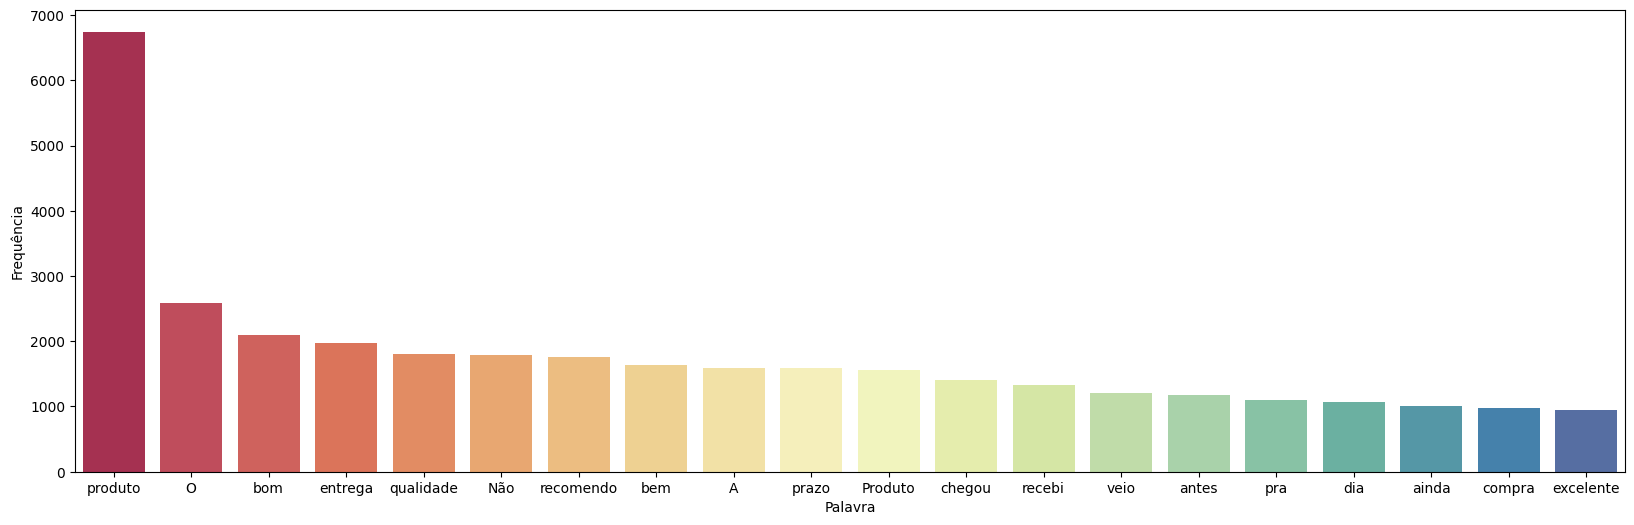

In [52]:
grafico_frequencia(df, 'tratamento_2', 20)

In [53]:
! pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.6 MB/s eta 0:00:00


In [54]:
import unidecode

In [55]:
frase = df['tratamento_2'][20]
print(frase)
frase_sem_acento = unidecode.unidecode(frase)
print(frase_sem_acento)

A empresa passa prazo á dias úteis boleto confirmado dia repassam mail falando previsto entrega responderam reclamações data data máxima entrega produto ridículo
A empresa passa prazo a dias uteis boleto confirmado dia repassam mail falando previsto entrega responderam reclamacoes data data maxima entrega produto ridiculo


In [56]:
sem_acentos = [unidecode.unidecode(word) for word in df['tratamento_2']]

stop_wordes_sem_acento = [unidecode.unidecode(word) for word in palavras_irrelevantes]

In [57]:
df['tratamento_3'] = sem_acentos

frase_processada = []

for opniao in df['tratamento_3']:
  #tokenize já foi instanciado anteriormente 'tokens'
  palavras_texto = tokens.tokenize(opniao)
  nova_frase = [word for word in palavras_texto if word not in stop_wordes_sem_acento]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_3'] = frase_processada

In [58]:
frase1 = df['tratamento_2'][70]
print(frase1)
frase2 = df['tratamento_3'][70]
print(frase2)

Melhor compra fiz últimos tempos Produto barato útil Produto robusto leve O teclado proporciona digitação confortável mouse preciso O teclado mouse usam apenas receptor economizando número portas USB computador Me livrei incomodo fios espaço trabalho ficou limpo harmonioso Ademais tudo parece bastante durável safisfeito Recomendo todos
Melhor compra fiz ultimos tempos Produto barato util Produto robusto leve O teclado proporciona digitacao confortavel mouse preciso O teclado mouse usam apenas receptor economizando numero portas USB computador Me livrei incomodo fios espaco trabalho ficou limpo harmonioso Ademais tudo parece bastante duravel safisfeito Recomendo todos


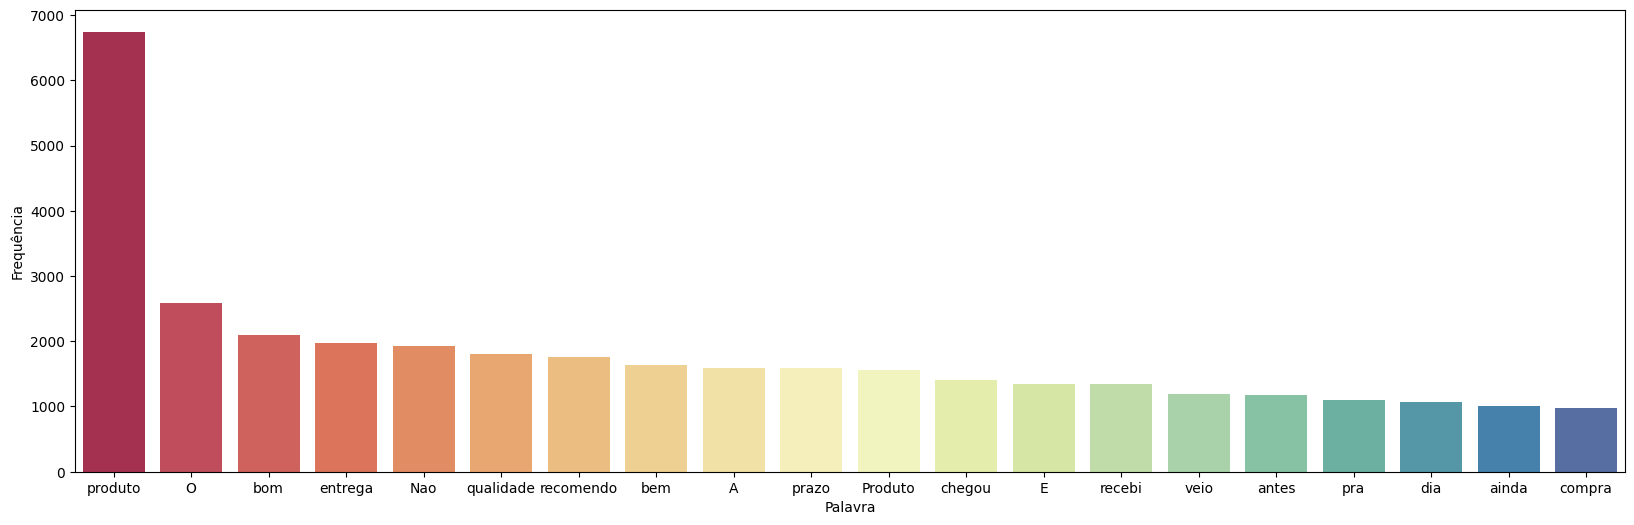

In [59]:
grafico_frequencia(df, 'tratamento_3', 20)

In [60]:
df['tratamento_3'][25]

'O produto anuncio diz largura chegou Vc compra determinado espaco consegue utilizar produto'

In [61]:
df['tratamento_3'][25].lower()

'o produto anuncio diz largura chegou vc compra determinado espaco consegue utilizar produto'

In [62]:
frase_processada = []

for opiniao in df['tratamento_3']:
  frase = opiniao.lower()
  #tokenize já foi instanciado anteriormente 'tokens'
  frase = tokens.tokenize(frase)
  nova_frase = [word for word in frase if word not in stop_wordes_sem_acento]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_4'] = frase_processada

In [63]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo",Esse smartphone superou expectativas recomendo,Esse smartphone superou expectativas recomendo,smartphone superou expectativas recomendo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...,cheiro desagradavel pra incomoda nao recomendoo,cheiro desagradavel pra incomoda recomendoo,cheiro desagradavel pra incomoda recomendoo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe...",Eu fiz compra loja entregou produto compra fei...,Eu fiz compra loja entregou produto compra fei...,fiz compra loja entregou produto compra feita ...
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif...",Atendeu expectativas achei luz ruim nada dific...,Atendeu expectativas achei luz ruim nada dific...,atendeu expectativas achei luz ruim nada dific...
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo...",Gostei achei ficou desejar qualidade fotos Ach...,Gostei achei ficou desejar qualidade fotos Ach...,gostei achei ficou desejar qualidade fotos ach...


In [64]:
frase1 = df['tratamento_3'][14]
print(frase1)
frase2 = df['tratamento_4'][14]
print(frase2)

O viva voz telefone comecou ativar sozinho semana E desativa posso tirar telefone gancho comeca fazer zunido forte A nota fiscal emitida somente comecei fazer uso ferias janeiro
viva voz telefone comecou ativar sozinho semana desativa posso tirar telefone gancho comeca fazer zunido forte nota fiscal emitida somente comecei fazer uso ferias janeiro


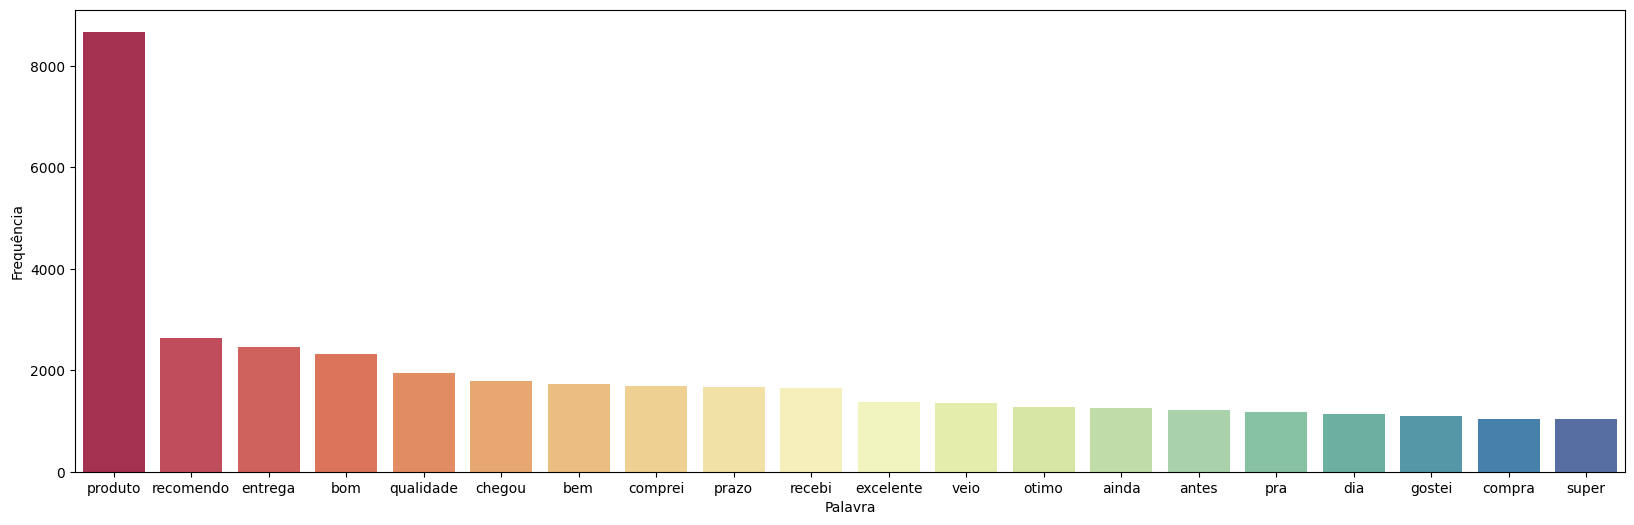

In [65]:
grafico_frequencia(df, 'tratamento_4', 20)

In [66]:
classificar_texto(df, 'tratamento_4', 'sentimento')

A acurácia do modelo é de 83.7461%


Nuvem de palavras para sentimento <font color='green'>positivo<font>

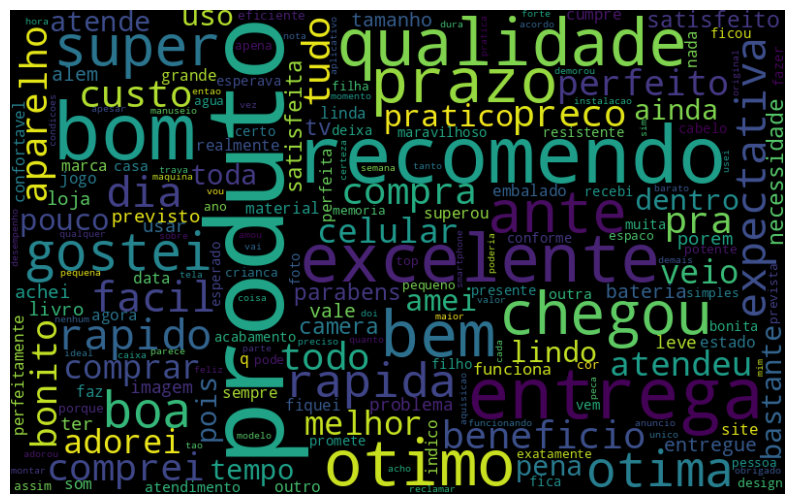

In [67]:
criar_nuvem_palavras(df, 'tratamento_4', 'sentimento', 'positivo')

Nuvem de palavras para sentimento <font color='red'>negativo<font>

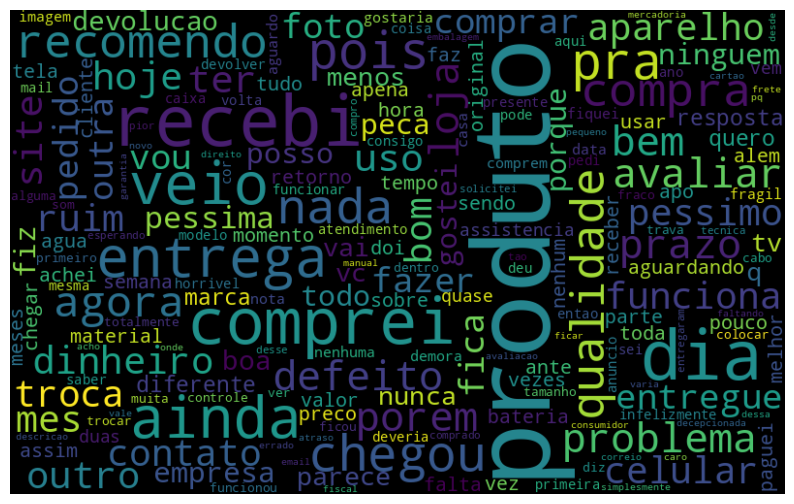

In [68]:
criar_nuvem_palavras(df, 'tratamento_4', 'sentimento', 'negativo')

Aplicando a técnica de stemmer, que reduz a palavra ao seu radical. A biblioteca é uma classe que faz parte da nltk e se chama RSLPStemmer()

In [69]:
#exemplos
stemmer = nltk.RSLPStemmer()

stemmer.stem('correria')

'corr'

In [70]:
stemmer.stem('correrão')

'corr'

Aplicando a técnica aos nossos dados.

In [71]:
frase_processada = []

for opiniao in df['tratamento_4']:
  # classe (tokens.WordPunctTokenizer()) já foi instanciada acima
  words = tokens.tokenize(opiniao)
  # a classe (stemmer.RSLPStemmer()) também já foi instanciada acima
  nova_frase = [stemmer.stem(word) for word in words]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_5'] = frase_processada

In [72]:
classificar_texto(df, 'tratamento_5', 'sentimento')

A acurácia do modelo é de 85.1135%


**Técnica TF-IDF**

Consiste em dar pesos diferentes para as palavras dependendo do seu valor para a frase.

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
frases = ['Comprei um produto ótimo', 'Comprei um produto péssimo']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)
matriz = tfidf.fit_transform(frases)

df_matriz = pd.DataFrame(matriz.todense(), columns=tfidf.get_feature_names_out())
df_matriz

,Comprei,produto,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


Aplicando no modelo

In [75]:
tfidf_bruto = tfidf.fit_transform(df['avaliacao'])

X_train, X_test, y_train, y_test = train_test_split(tfidf_bruto, df['sentimento'], random_state=4978)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

accuracy = logistic_regression.score(X_test, y_test)
print(f'Acurácia: {accuracy * 100:.2f}%.')

Acurácia: 79.54%.


Aplicando nos dados tratados.

In [76]:
# TF-IDF já foi instanciado acima
tfidf_tratado = tfidf.fit_transform(df['tratamento_5'])

X_train, X_test, y_train, y_test = train_test_split(tfidf_tratado, df['sentimento'], random_state=4978)

logistic_regression.fit(X_train, y_train)

accuracy = logistic_regression.score(X_test, y_test)
print(f'Acurácia: {accuracy * 100:.2f}%.')

Acurácia: 85.14%.


Utilizando uma técnica para capturar contextos. Ela irá, a depender da quantidade de ngrams, por exemplo se estivermos usando bigrams, irá fazer pares com palavras consecutivas no texto. Utilizando a biblioteca **ngrams** da NLTK.

In [77]:
from nltk import ngrams

In [78]:
frase = 'Comprei um produto ótimo'

# classe instanciada anteriormente
frase_separada = token_espaco.tokenize(frase)
# o parâmetro '2' serve para especificar a quantidade de n-gramns. Ex: 1 para unigrams, 2 para bigrams...
pares = ngrams(frase_separada, 2)
list(pares)

[('Comprei', 'um'), ('um', 'produto'), ('produto', 'ótimo')]

In [79]:
# o parâmetro ngram_range implica na quantidade de grams que queremos. Ex: (1, 2) quer dizer q teremos unigrams até bigrams
tfidf_50 = TfidfVectorizer(lowercase=False, max_features=50, ngram_range=(1, 2))
vetor_tfidf = tfidf_50.fit_transform(df['tratamento_5'])

X_train, X_test, y_train, y_test = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
logistic_regression.fit(X_train, y_train)

accuracy = logistic_regression.score(X_test, y_test)
print(f'Acurácia do modelo com 50 features e n-grams: {accuracy * 100:.2f}%.')

Acurácia do modelo com 50 features e n-grams: 85.22%.


Fazendo testes com uma quantidade maior de features

In [80]:
tfidf_100 = TfidfVectorizer(lowercase=False, max_features=100, ngram_range=(1, 2))
vetor_tfidf = tfidf_100.fit_transform(df['tratamento_5'])

X_train, X_test, y_train, y_test = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
logistic_regression.fit(X_train, y_train)

accuracy = logistic_regression.score(X_test, y_test)
print(f'Acurácia do modelo com 100 features e ngrams: {accuracy * 100:.2f}%.')

Acurácia do modelo com 100 features e ngrams: 88.21%.


Por fim, com todas as features.

In [81]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1, 2))
vetor_tfidf = tfidf.fit_transform(df['tratamento_5'])

X_train, X_test, y_train, y_test = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
logistic_regression.fit(X_train, y_train)

accuracy = logistic_regression.score(X_test, y_test)
print(f'Acurácia com todas as features: {accuracy * 100:.2f}%.')

Acurácia com todas as features: 91.85%.


In [82]:
vetor_tfidf.shape

(15501, 114123)

Com 1000 features.

In [83]:
tfidf_1000 = TfidfVectorizer(lowercase=False, max_features=1000, ngram_range=(1, 2))
vetor_tfidf = tfidf_1000.fit_transform(df['tratamento_5'])

X_train, X_test, y_train, y_test = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
logistic_regression.fit(X_train, y_train)

accuracy = logistic_regression.score(X_test, y_test)
print(f'Acurácia com 1000 features e ngrams: {accuracy * 100:.2f}%.')

Acurácia com 1000 features e ngrams: 91.85%.


In [84]:
pesos = pd.DataFrame(logistic_regression.coef_[0].T, index=tfidf_1000.get_feature_names_out())

In [85]:
pesos.nlargest(50, 0)

,0
otim,7.808669
excel,7.449268
bom,5.990104
perfeit,5.078838
ador,5.034260
satisfeit,4.816196
rap,4.232814
lind,3.762726
ame,3.509609
maravilh,3.477517


In [86]:
pesos.nsmallest(50, 0)

,0
pess,-4.632123
receb,-4.067055
ruim,-4.059795
frac,-3.694803
horri,-3.376634
defeit,-3.033516
fragil,-3.026329
decepcion,-2.899696
devolv,-2.893880
dinh,-2.692323


# Testando o modelo de classificação

In [87]:
import joblib

joblib.dump(tfidf_1000, 'tfidf_vectorizer.pkl')
joblib.dump(logistic_regression, 'logistic_regression.pkl')

['logistic_regression.pkl']

In [88]:
tfidf = joblib.load('tfidf_vectorizer.pkl')
logistic_regression = joblib.load('logistic_regression.pkl')

Criando a função que vai fazer o tratamento das novas avaliações.

In [89]:
# Instanciando classe para criação da lista de stopwords
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
# Para tokenização do texto, inclusive das pontuações
token_pontuacao = tokenize.WordPunctTokenizer()
# Para remoção da parte da palavra que não corresponde ao seu radical
stemmer = nltk.RSLPStemmer()

def processar_avaliacao(avaliacao):
  # Passo 1
  tokens = token_pontuacao.tokenize(avaliacao)
  # Passo 2
  frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes]
  # Passo 3
  frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()]
  # Passo 4. Obs: a classe unidecode da biblioteca unidecode, retira a acentuação da palavra
  frase_processada = [unidecode.unidecode(palavra) for palavra in frase_processada]
  # Passo 5 Obs: a classe RSLPStemmer automaticamente já converte o texto para lower(), por isso não fizemos isso antes
  frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]

  return ' '.join(frase_processada)

Fazendo a predição com novas avaliações.

In [90]:
# Novas avaliações para prever
novas_avaliacoes = ["Ótimo produto, super recomendo!",
                 "A entrega atrasou muito! Estou decepcionado com a compra",
                 "Muito satisfeito com a compra. Além de ter atendido as expectativas, o preço foi ótimo",
                 "Horrível!!! O produto chegou danificado e agora estou tentando fazer a devolução.",
                 '''Rastreando o pacote, achei que não fosse recebê-lo, pois, na data prevista, estava sendo entregue em outra cidade.
                 Mas, no fim, deu tudo certo e recebi o produto.Produto de ótima qualidade, atendendo bem as minhas necessidades e por
                 um preço super em conta.Recomendo.''']

In [91]:
novas_avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes]
novas_avaliacoes_processadas

['otim produt sup recom',
 'entreg atras decepcion compr',
 'satisfeit compr alem ter atend expect prec otim',
 'horri produt cheg danific agor tent faz devoluca',
 'rastre pacot ach receb lo poi dat prev send entreg outr cidad fim deu tud cert receb produt produt otim qual atend bem necess prec sup cont recom']

In [92]:
novas_avaliacoes_tfidf = tfidf.transform(novas_avaliacoes_processadas)
predicoes = logistic_regression.predict(novas_avaliacoes_tfidf)
predicoes

array(['positivo', 'negativo', 'positivo', 'negativo', 'positivo'],
      dtype=object)

In [93]:
df_predicoes = pd.DataFrame({'Avaliação': novas_avaliacoes, 'Sentimento': predicoes})
df_predicoes

,Avaliação,Sentimento
0,"Ótimo produto, super recomendo!",positivo
1,A entrega atrasou muito! Estou decepcionado co...,negativo
2,Muito satisfeito com a compra. Além de ter ate...,positivo
3,Horrível!!! O produto chegou danificado e agor...,negativo
4,"Rastreando o pacote, achei que não fosse receb...",positivo


In [94]:
avaliacao_iogurte = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/novas_avaliacoes.csv')

In [95]:
avaliacao_iogurte

,ID_avaliacao,avaliacao
0,8558,Até que o sabor é bom. Muito melhor que tomar ...
1,3553,"Nossa sério, absurdo, compro o produto com rec..."
2,5590,Bom custo benefício
3,6617,Saboroso e nutritivo. Tem me salvado nos dias ...
4,7987,"Fiquei decepcionada com a situação, a embalage..."
5,9102,Uma unidade do pacote veio furada e vazou em t...
6,4992,Comprei em junho mas o produto venceu em março
7,2127,"Gente, o meu chegou todo certinho, eu tava com..."
8,6697,"Gosto muito desse produto, ótima qualidade, e ..."
9,1986,Esse produto veio na quantidade que eu não ped...


In [96]:
avaliacoes_iogurte_processadas = [processar_avaliacao(avaliacao) for avaliacao in avaliacao_iogurte['avaliacao']]
avaliacoes_iogurte_processadas

['sab bom melhor tom whey val pen lanch cei dia corr',
 'seri absurd compr produt recorrenc dess vez sent gost estranh rep assim compr venc vei lev venc desd marc send entreg pra mim julh',
 'bom cust benefici',
 'sabor nutri salv dia corr trabalh da faz lanch ajud bast trein',
 'fiq decepcion situaca embal cheg total encharc deix mercad port condomini chei formig embal derret unidad estour rest derret poi embal produt papela total impropri consum',
 'unidad pacot vei fur vaz tod gelad',
 'compr junh produt venc marc',
 'gent cheg tod cert tav med vir falt quas praz validad vei tud perfeit dentr praz bem embal tud tranquil recom demal',
 'gost dess produt otim qual prec bom compar vem merc',
 'produt vei quant ped aind vei dat validad prox quer reembols dess compr',
 'tod vier venc mes atr']

In [97]:
avaliacao_iogurte_tfidf = tfidf.transform(avaliacoes_iogurte_processadas)
predicoes_iogurte = logistic_regression.predict(avaliacao_iogurte_tfidf)

In [98]:
df_previsoes_iogurte = pd.DataFrame({'Avaliação': avaliacao_iogurte['avaliacao'], 'Sentimento Previsto': predicoes_iogurte})
df_previsoes_iogurte

,Avaliação,Sentimento Previsto
0,Até que o sabor é bom. Muito melhor que tomar ...,positivo
1,"Nossa sério, absurdo, compro o produto com rec...",negativo
2,Bom custo benefício,positivo
3,Saboroso e nutritivo. Tem me salvado nos dias ...,positivo
4,"Fiquei decepcionada com a situação, a embalage...",negativo
5,Uma unidade do pacote veio furada e vazou em t...,negativo
6,Comprei em junho mas o produto venceu em março,negativo
7,"Gente, o meu chegou todo certinho, eu tava com...",positivo
8,"Gosto muito desse produto, ótima qualidade, e ...",positivo
9,Esse produto veio na quantidade que eu não ped...,negativo
